# What Is the Best Sales Method? 

## Executive Summary

#### Problem Statement
The following report looks at the sales of Pens and Printers which provides high quality office products to large
organizations. The company launched a new product line and wants to ensure it uses the best sales methods. The three different methods used by the company are Email, Call and Email and Call. The goal of this report is to help the company determine which sales method performs the best.

#### Methodology

#### Clean and validate the data
I explore the data and I find that the values for 'sales_method' were not entered in a consistent way so I make the necessary adjustments. Furthermore, there is missing data for 'revenue' so I make an assumption that the best way to replace the missing values is with the mean for revenue. The final change in the data is in 'years_as_customer' since two of the values are outside of the range which is expected based on the data description. I replace the values with the median. The rest of the data seems to be in line with the description of the data provided in the instructions.

#### Group the data and create visualizations
I group the data in various ways and present the most relevant visualizations. Most of the customers come from 'Email' sales method. 'Email + Call' is the least common method but it generates the highest revenue per customer. 'Call' performs the worst in terms of revenue generated per customer. The profitability of all sales methods increases over time. Overall, the average revenue per customer for each sales method is similar across customers that have been with the company throughout the years. There is only a slight for decrease for 'Email + Call' which is on average less profitable for customers that have been with the company for 20 to 30 or more than 30 years. Finally, the revenue per customer is higher for customers who have visited the site more often.

#### Conclusion and Recommendations
Based on the analysis, it seems that 'Email + Call' brings in the most revenue per customer. Pens and Printers should prioritize it even if it is more time-consuming. Also, it is beneficial if customers visit the website more often so the company needs to prioritize increasing traffic to its website. I suggest the following metrics in order to monitor the performance of the sales:
- % of sales coming from 'Email + Call' sales method
- Revenue per customer for each sales method
- Number of times the customer has visited the website in the last six months.

## Load and inspect the data

In [103]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# Load data
sales = pd.read_csv('product_sales.csv')

In [105]:
# Inspect first five rows in the data
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [106]:
# Information about the dataframe and columns
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [107]:
# Display number of missing values
sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

All the columns have the correct data type. The data for 'week', 'nb_sold', 'years_as_customer' and 'nb_site_visits' have data type int64 which is expected since there columns refer to quantities. There_ is missing data only for 'revenue'. All the other columns don't contain missing values.

## Clean and validate the data

I validate the data by looking at the unique values and ranges in each column. If necessary, I will further investigate the values using other methods.

In [108]:
# Print the number of unique values and range (if relevant) in each column
print('The number of unique values and range (if relevant) in each column is:')
print('Week:', sales['week'].nunique(), 'unique values and range is', sales['week'].min(), 'to', sales['week'].max())
print('Sales method:', sales['sales_method'].nunique(), 'unique values')
print('Customer ID:', sales['customer_id'].nunique(), 'unique values')
print('New products sold:', sales['nb_sold'].nunique(), 'unique values and range is', sales['nb_sold'].min(), 'to', sales['nb_sold'].max())
print('Revenue:', sales['revenue'].nunique(), 'unique values and range is', sales['revenue'].min(), 'to', sales['revenue'].max())
print('Years as customer:', sales['years_as_customer'].nunique(), 'unique values and range is', sales['years_as_customer'].min(), 'to', sales['years_as_customer'].max())
print('Number of site visits:', sales['nb_site_visits'].nunique(), 'unique values and range is', sales['nb_site_visits'].min(), 'to', sales['nb_site_visits'].max())
print('State:', sales['state'].nunique(), 'unique values')

The number of unique values and range (if relevant) in each column is:
Week: 6 unique values and range is 1 to 6
Sales method: 5 unique values
Customer ID: 15000 unique values
New products sold: 10 unique values and range is 7 to 16
Revenue: 6743 unique values and range is 32.54 to 238.32
Years as customer: 42 unique values and range is 0 to 63
Number of site visits: 27 unique values and range is 12 to 41
State: 50 unique values


1. Unique values:
- Almost all data has a reasonable number of unique values. According to the description of the data, there are only six weeks of data covered which aligns with the number of unique values in the 'week' column. The number of unique customer IDs corresponds to the total number of rows previously seen so there aren't any duplicates or missing data. I will still double-check this later. The number of states implies that the company conducts business in all states of the USA. I will also confirm this assumption later. 
- There are two variables that need to be validated further:
    - 'sales_method': The description of the data mentioned three sales methods but there are five unique values in the column.
    - 'years_as_customer': The company was founded in 1984 and the current year is 2024 so there should be 41 unique values or less, instead there are 42 in the current data.

2. Ranges
- Almost all data has ranges aligned with the data description. The number of weeks is as expected. The ranges for 'nb_sold' and 'nb_site_visits' also appear reasonable. 
- There are two variables that need to be validated further:
    - The range for 'years_as_customer' is not in line with the description of the data. The company was founded in 1984 and the current year is 2024 so the expected range was 0 - 41 or narrower and the range in the file is 0 - 63.
    - The range for 'revenue' is quite wide so I will plot the variable and examine it for any outliers.

Let's continue with looking into the years_as_customer column. I start by plotting the values.

c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Histogram of 'years_as_customer'")

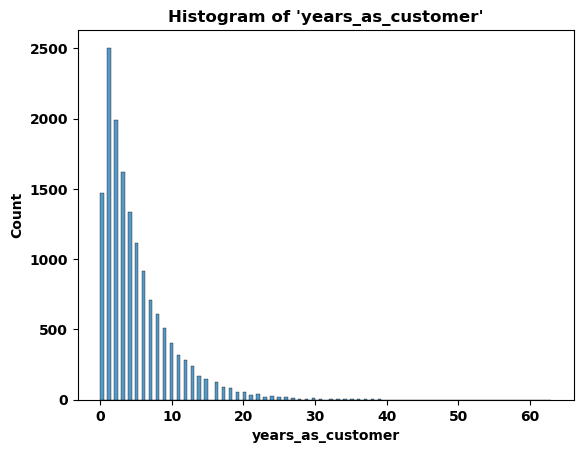

In [109]:
# Plot a histogram of 'years_as_customer'
sns.histplot(x = sales['years_as_customer'])
plt.title("Histogram of 'years_as_customer'")

In [110]:
# Calculate the mean and median for 'years_as_customer'
print("The median for 'years_as_customer' is", sales['years_as_customer'].median(), 'and the mean is', sales['years_as_customer'].mean())

The median for 'years_as_customer' is 3.0 and the mean is 4.965933333333333


In [111]:
# Print rows containing values in 'years_as_customer' outside of the expected range.
sales[sales['years_as_customer']>41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


The histogram of 'years_as_customer' shows that the data is right-skewed so the median (3.00) is lower than the mean (4.97). As previously stated, the expected range of the data is 0 - 41 or narrower but there are two values that are unexpectedly high: 47 and 63. I replace those values with the median which is more robust than the mean in case of skewed data.

In [112]:
# Replace the values outside the expected range with median in 'years_as_customer'
a = sales['years_as_customer'].median()
sales['years_as_customer'] = sales['years_as_customer'].map(lambda x: a if x > 41 else x)

c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Histogram of 'revenue'")

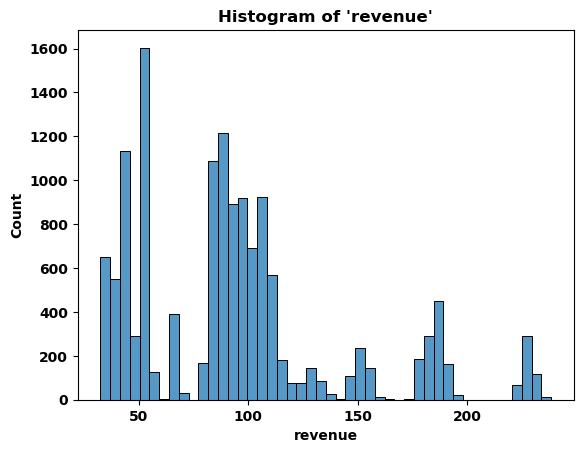

In [113]:
# Plot a histogram for 'revenue'
sns.histplot(x = sales['revenue'])
plt.title("Histogram of 'revenue'")

In [114]:
# Calculate the mean and median for 'revenue'
print("The mean for 'revenue' is", sales['revenue'].mean(), 'and median is', sales['revenue'].median())

The mean for 'revenue' is 93.93494255349705 and median is 89.5


As we can see in the histogram, the majority of the values for 'revenue' are concentrated in two clusters around 50 and 100. There are fewer values over 120 with some outliers on the right side of the graph. The median is lower than the mean of 'revenue' due to the skewness. 

As we previously saw, there are 1074 missing values in the 'revenue' column which is less than 7% of all data. Because of the skewness of the data and the outliers, I will replace the missing values in with the median instead of the mean. 

In [115]:
# Calculate the median of the revenue
median_revenue = sales['revenue'].median()

# Replace missing values with mean
sales['revenue'].fillna(median_revenue, inplace = True)

Afterwards, I validate the 'sales_method' column which we saw has more unique values than expected.

In [116]:
# Examine the data in the 'sales_method' column
sales['sales_method'].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

The text in 'sales_method' shows that the data was not entered in a consistent way. I will make the necessary adjustments for 'em + call' and 'email' below so that they are registered as 'Email + Call' and 'Email'.

In [117]:
# Adjust the values in the 'sales_method' column
sales['sales_method'] = sales['sales_method'].str.replace('email', 'Email')
sales['sales_method'] = sales['sales_method'].replace('em + call', 'Email + Call')
sales['sales_method'].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

The description of the data says that the customer_id column contains the unique identifier for the customer. Below I double-check that all the values in the 'customer_id' column are unique which is indeed the case.

In [118]:
# Double-check that there are no duplicates in the column for customer IDs
print(sales[sales.duplicated(subset='customer_id', keep=False)])

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


Although the number of unique values in 'state' seemed correct, I further validate the data by printing the unique values.

In [119]:
# Print the unique values in 'state'
print(sorted(sales['state'].unique()))

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


There are no misspelled values in 'state' and all the data seems to be correct so there is no need of further data validation.

## Group the data and create visualizations

c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Count of customers according to years as customers')

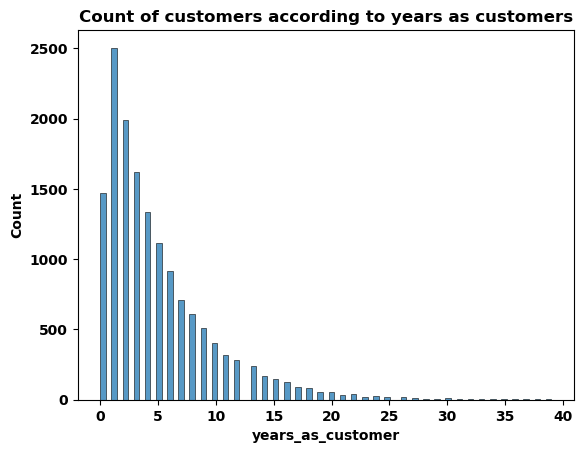

In [120]:
# Plot a histogram of 'years_as_customer'
sns.histplot(x = sales['years_as_customer'])
plt.title('Count of customers according to years as customers')

In [121]:
print('The range of years_as_customer is', sales['years_as_customer'].min(),'-', sales['years_as_customer'].max())

The range of years_as_customer is 0.0 - 39.0


The range of years_as_customer is 0-63 and most of the customers have been with the company for less than 10 years. Next, I split the data in different bins in order to group the customers according to the time they have been with the company.

C:\Users\tkirov\AppData\Local\Temp\ipykernel_26168\483190011.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_years_as_customer = sales.groupby('ranges_years_as_customer')['revenue'].sum().reset_index()
c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Revenue from customers according to the years they have been with the company')

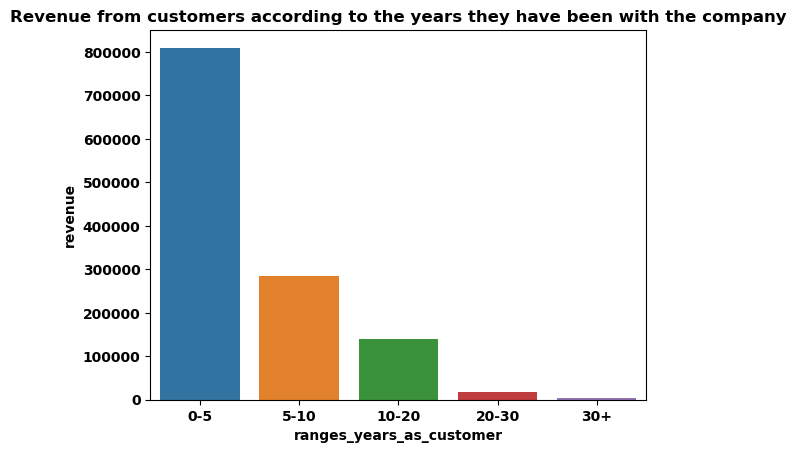

In [122]:
sales['ranges_years_as_customer'] = pd.cut(sales['years_as_customer'], bins=[0, 5, 10, 20, 30, 100], 
                             labels=['0-5', '5-10', '10-20', '20-30', '30+'])
revenue_years_as_customer = sales.groupby('ranges_years_as_customer')['revenue'].sum().reset_index()
sns.barplot(x = revenue_years_as_customer['ranges_years_as_customer'], y = revenue_years_as_customer['revenue'])
plt.title('Revenue from customers according to the years they have been with the company')

In [123]:
# Group the data according to the sales method
sales_method = sales.groupby('sales_method')['customer_id'].count().reset_index()

Text(0.5, 1.0, 'Number of customers for each sales method')

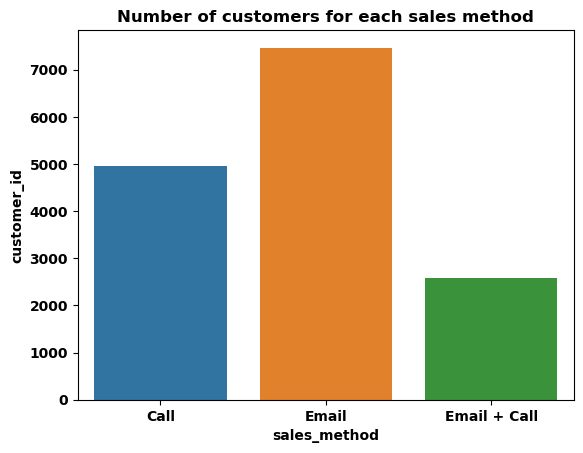

In [124]:
# Plot the number of customers for each sales method
sns.barplot(x = sales_method['sales_method'], y = sales_method['customer_id'])
plt.title('Number of customers for each sales method')

Most of the customers come from 'Email' sales method and 'Email + Call' is the least common sales method. Later, I will look at the range of revenue split for each sales method.

   sales_method   revenue
0          Call  243763.0
1         Email  721006.0
2  Email + Call  439492.0


Text(0.5, 1.0, 'Total revenue for each sales method')

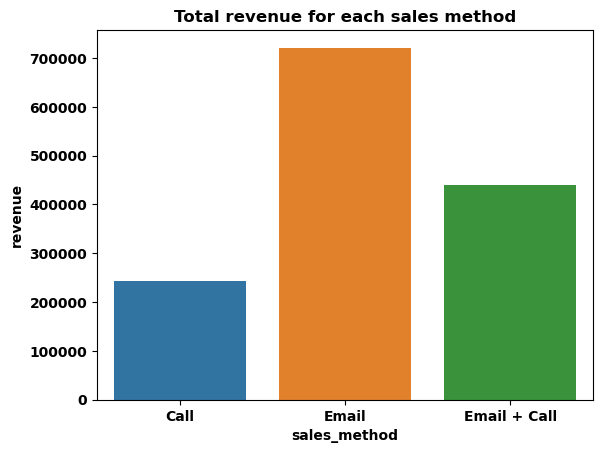

In [125]:
# Group the revenue according to the sales method
sales_method_sum = sales.groupby('sales_method')['revenue'].sum().reset_index()
print(round(sales_method_sum))

# Plot the total revenue for each sales method
sns.barplot(x = sales_method_sum['sales_method'], y = sales_method_sum['revenue'])
plt.title('Total revenue for each sales method')

In the graph 'Number of customers for each sales method' we saw that 'Email + Call' was the least common method but in the graph 'Total revenue for each sales method' we see that it generated more total revenue than 'Call'. Thus, it seems that 'Email + Call' generates higher revenue per customer than 'Call'. Next, I will look at the spread of the revenue in order to confirm this.

Text(0.5, 1.0, 'Spread of the total revenue')

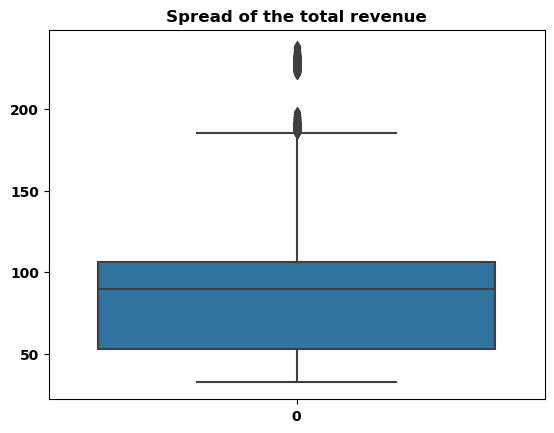

In [126]:
# Plot the spread of the total revenue
sns.boxplot(sales['revenue'])
plt.title('Spread of the total revenue')

Text(0.5, 1.0, 'Spread of the revenue for each sales method')

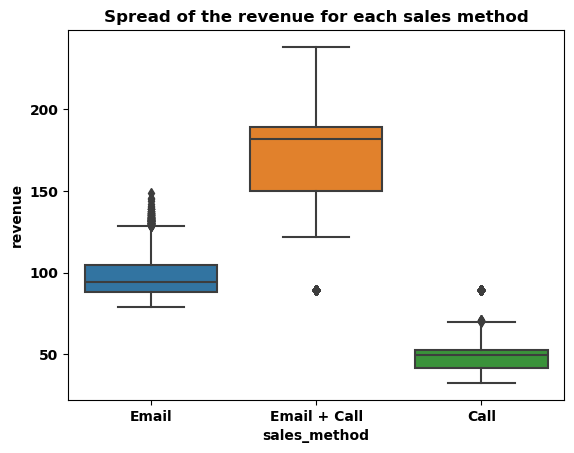

In [127]:
# Plot the spread of the revenue for each sales method
sns.boxplot(x = sales['sales_method'], y = sales['revenue'])
plt.title('Spread of the revenue for each sales method')

Earlier we saw that 'Email + Call' was the least common sales method and here we see that it has the highest median and spread per customer. On the other hand, 'Call' performs the worst. 'Email + Call' is possibly the best sales method for increasing profitability for the company.

Text(0.5, 1.0, 'Total revenue for each week')

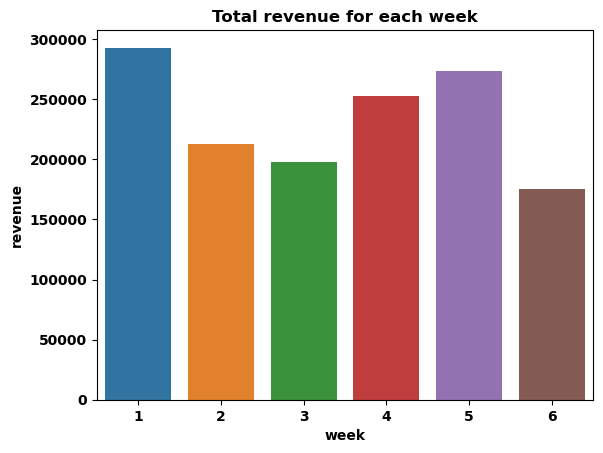

In [128]:
# Group the data according to the total revenue for each week
sales_week = sales.groupby('week')['revenue'].sum().reset_index()

# Plot the total revenue for each week
sns.barplot(x = sales_week['week'], y = sales_week['revenue'])
plt.title('Total revenue for each week')

The first week was the most profitable for the company and week 4 and 5 still perform better than week 2 and 3. The last week is the worst in terms of revenue. Later I will look at the revenue for each week split according to the sales method.

Text(0.5, 1.0, 'Total revenue for each week split by sales method')

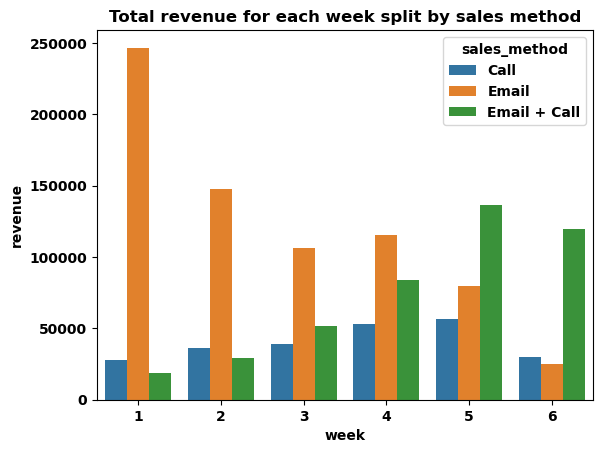

In [129]:
# Group the data according to the total revenue for each week
sales_week = sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Plot the total revenue for each week
sns.barplot(x = sales_week['week'], y = sales_week['revenue'], hue = sales_week['sales_method'])
plt.title('Total revenue for each week split by sales method')

The graph above shows that the total revenue from 'Email' decreases while 'Call' and 'Email + Call' increase except for week 6. Later, I will look at the average values.

Text(0.5, 1.0, 'Average revenue for each week split by sales method')

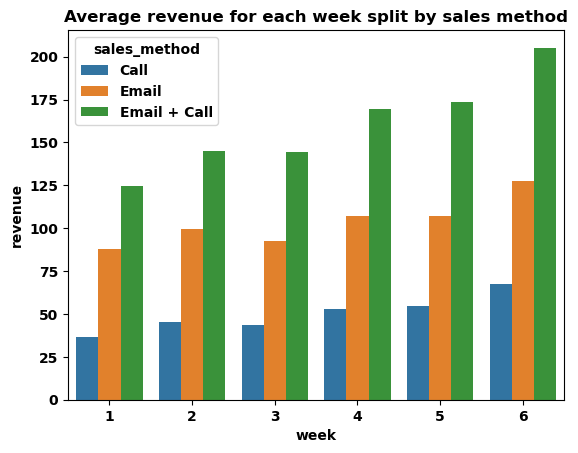

In [130]:
# Group the data according to the average revenue for each week
sales_week = sales.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

# Plot the average revenue for each week
sns.barplot(x = sales_week['week'], y = sales_week['revenue'], hue = sales_week['sales_method'])
plt.title('Average revenue for each week split by sales method')

As expected based on previous graphs, 'Email + Call' delivers by far the highest revenue per customer, while 'Call' delivers the lowest. The profitability of all sales methods increases over the period. 

C:\Users\tkirov\AppData\Local\Temp\ipykernel_26168\1394106890.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_week = sales.groupby(['sales_method', 'ranges_years_as_customer'])['revenue'].mean().reset_index()
c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

Text(0.5, 1.0, 'Average revenue for each type of customer split by sales method')

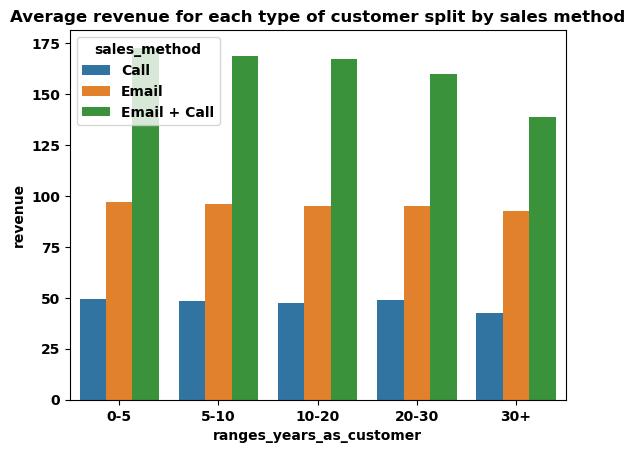

In [131]:
# Group the data according to the average revenue for each sales method and ranges of years as customer
sales_week = sales.groupby(['sales_method', 'ranges_years_as_customer'])['revenue'].mean().reset_index()

# Plot the average revenue for each customer group
sns.barplot(x = sales_week['ranges_years_as_customer'], y = sales_week['revenue'], hue = sales_week['sales_method'])
plt.title('Average revenue for each type of customer split by sales method')

Overall, the average revenue per customer for each sales method is similar across customers that have been with the company throughout the years. There is only a slight decrease for 'Email + Call' which is on average less profitable for customers that have been with the company for 20 to 30 or more than 30 years.

c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of number of site visits')

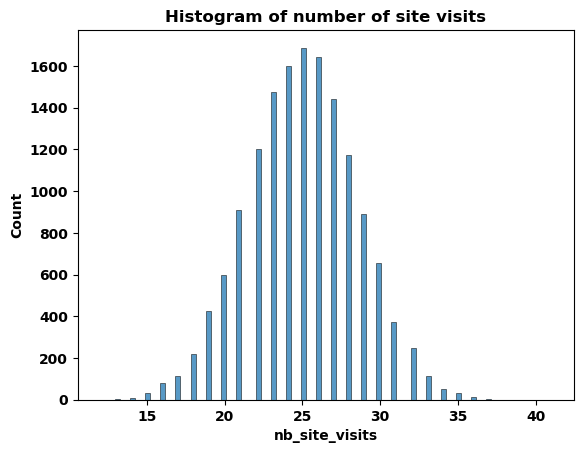

In [132]:
# Plot a histogram of nb_site_visits
sns.histplot(sales['nb_site_visits'])
plt.title('Histogram of number of site visits')

The histogram of nb_site_visits seems to be normally distributed. Most of the sales are concentrated around the mean of 25. Similar to what I did with years_as_customer, I split the data for nb_site_visits into bins in order to make the analysis easier.

C:\Users\tkirov\AppData\Local\Temp\ipykernel_26168\2508087533.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_site_visits = sales.groupby(['range_nb_site_visits', 'sales_method'])['revenue'].mean().reset_index()
c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

Text(0.5, 1.0, 'Average revenue per customer group split according to site visits')

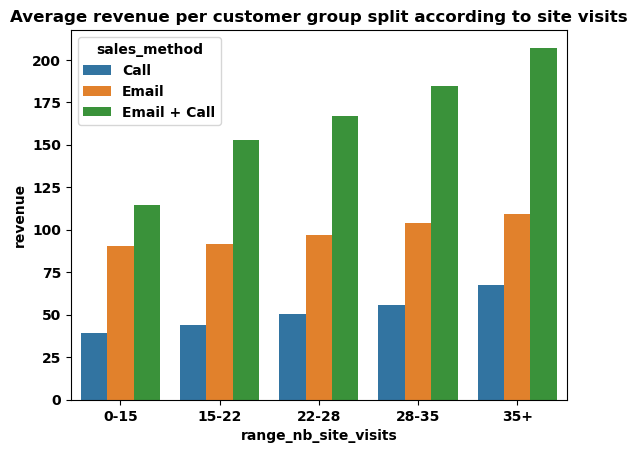

In [133]:
# Group the data according to the number of site visits
sales['range_nb_site_visits'] = pd.cut(sales['nb_site_visits'], bins = [0, 15, 22, 28, 35, 100], labels = ['0-15', '15-22', '22-28', '28-35', '35+'])

sales_site_visits = sales.groupby(['range_nb_site_visits', 'sales_method'])['revenue'].mean().reset_index()

# Plot the revenue per sales method for each group of customers according to number of size visits
sns.barplot(x = sales_site_visits['range_nb_site_visits'], y = sales_site_visits['revenue'], hue = sales_site_visits['sales_method'])
plt.title('Average revenue per customer group split according to site visits')

It appears that the revenue per customer is higher for customers who have visited the site more often, especially for those who have been approached by 'Email + Call'. Similar to the previous graphs, this graphs also shows that 'Email + Call' is the most profitable sales method.

#### Conclusion and Recommendations
Based on the analysis, it seems that 'Email + Call' brings in the most revenue per customer. Pens and Printers should prioritize it even if it is more time-consuming. Also, it is beneficial if customers visit the website more often so the company needs to prioritize increasing traffic to its website.

I suggest the following metrics in order to monitor the performance of the sales:
- % of sales coming from 'Email + Call' sales method
- Revenue per customer for each sales method
- Number of times the customer has visited the website in the last six months.